In [ ]:
!unzip /content/Dataset02.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/cloudy/train_23566.jpg  
  inflating: data/cloudy/train_23598.jpg  
  inflating: data/cloudy/train_23608.jpg  
  inflating: data/cloudy/train_23634.jpg  
  inflating: data/cloudy/train_23636.jpg  
  inflating: data/cloudy/train_23646.jpg  
  inflating: data/cloudy/train_2366.jpg  
  inflating: data/cloudy/train_23664.jpg  
  inflating: data/cloudy/train_23706.jpg  
  inflating: data/cloudy/train_2380.jpg  
  inflating: data/cloudy/train_23805.jpg  
  inflating: data/cloudy/train_23806.jpg  
  inflating: data/cloudy/train_23826.jpg  
  inflating: data/cloudy/train_23843.jpg  
  inflating: data/cloudy/train_23877.jpg  
  inflating: data/cloudy/train_23884.jpg  
  inflating: data/cloudy/train_23953.jpg  
  inflating: data/cloudy/train_2396.jpg  
  inflating: data/cloudy/train_23978.jpg  
  inflating: data/cloudy/train_23979.jpg  
  inflating: data/cloudy/train_23980.jpg  
  inflating: data/cloudy/train_23981.jpg  
  infl

In [ ]:
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
import seaborn

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dir = '/content/data'
labels = os.listdir(dir)
labels

['desert', 'green_area', 'cloudy', 'water']

printing how many image we have for each class

In [ ]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

desert 1131
green_area 1500
cloudy 1500
water 1500


plotting an example for each class of image

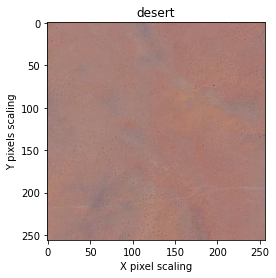

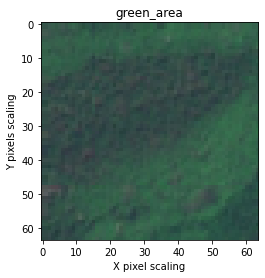

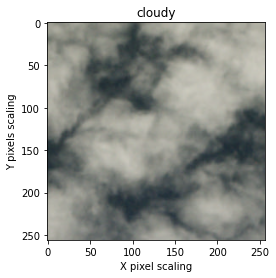

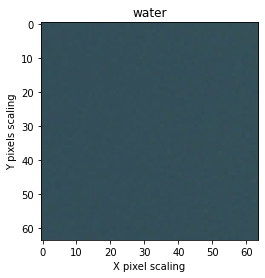

In [ ]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

`ImageDataGenerator` is a class in Keras that is imported like any other object in the library. The generator will run through your image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.

`samplewise_center` transforms the images to 0 mean. This is done by using the formulae. X = X - mean(X) But for the ImageDataGenerator to do this transformation it needs to know the mean of the dataset and fit method on the ImageDataGenerator does exactly this operation of calculating these statistics.

`rotation_wise` a property of the image (a function in this context) that will not change or just change a little if we transform (rotated, scaled, blurred, etc) the image.

`Rescale` provides GPU-based HPC nodes and clusters for training deep learning models in the cloud.

`rotation` is a property of the image (a function in this context) that will not change or just change a little if we transform (rotated, scaled, blurred, etc) the image.

`Batch size` is the number of training examples in one epoch (the higher the batch size, the more memory we’ll need).

`target size` is the size of image Height & Width: Pixel dimensions of image

In [ ]:
datagen = ImageDataGenerator(
        samplewise_center=True, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=False,
        rescale=1./255,
        validation_split=0.2)


train_data=datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


test_data=datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


printing the images after the augmentation

Found 5631 images belonging to 4 classes.


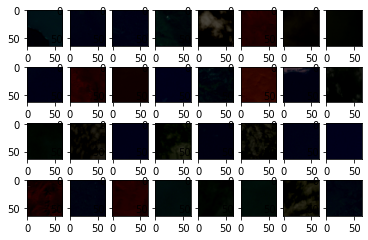

In [ ]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

`Sequential model` means each layer has exactly one input and output and is stacked together to form the entire network.

`Conv2D` -> is the numbers of filters that convolutional layers will learn from. It is an integer value and also determines the number of output filters in the convolution. Here we are learning a total of 32 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume.

`BatchNormalization` is a technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier. the standard deviation of the neurons' output.


`MaxPool2D` is a pooling operation that selects the maximum element from the region of the feature map covered by the filter


`Dropout` refers to dropping out the nodes (input and hidden layer) in a neural network


`Flattening` is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image.


`Dense Layer` is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons.


`Flattening` is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image.


`Stride` is the number of pixels shifts over the input matrix. When the stride is 1 then we move the filters to 1 pixel at a time. When the stride is 2 then we move the filters to 2 pixels at a time and so on


`Padding` is simply a process of adding layers of zeros to our input images. This prevents shrinking as, if p = number of layers of zeros added to the border of the image, then our (n x n) image becomes (n + 2p) x (n + 2p) image after padding


`Activation functions` introduce non-linearity to the model which allows it to learn complex functional mappings between the inputs and response variables. There are quite a few different activation functions like sigmoid, tanh, RelU, Leaky RelU, etc.


`RelU` function is a piecewise linear function that outputs the input directly if is positive i.e. > 0, otherwise, it will output zero. RelU activation function is applied right after a convolution layer and then that output is max pooled.

`Softmax Function`, is to test the reliability of the model using as Loss Function the Cross Entropy Function, in order to maximize the performance of our neural network.


`Dropout` is a regularization technique used to reduce over-fitting on neural networks. Usually, deep learning models use dropout on the fully connected layers, but is also possible to use dropout after the max-pooling layers, creating image noise augmentation.



In [ ]:

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(64,64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))

`categorical_crossentropy` is used as a loss function for multi-class classification model where there are two or more output labels.

`Adam optimizer` is an  algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

`Accuracy` is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.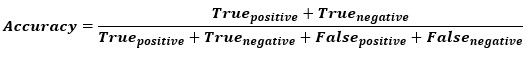



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=40
                    ) 
                    #callbacks=[callback])

Epoch 1/40
141/141 [==============================] - 122s 855ms/step - loss: 0.6224 - accuracy: 0.8269 - val_loss: 2.3966 - val_accuracy: 0.4281
Epoch 2/40
141/141 [==============================] - 121s 855ms/step - loss: 0.4419 - accuracy: 0.8857 - val_loss: 2.5975 - val_accuracy: 0.3952
Epoch 3/40
141/141 [==============================] - 121s 859ms/step - loss: 0.2512 - accuracy: 0.9199 - val_loss: 3.2121 - val_accuracy: 0.6128
Epoch 4/40
141/141 [==============================] - 122s 866ms/step - loss: 0.2246 - accuracy: 0.9250 - val_loss: 1.9003 - val_accuracy: 0.6625
Epoch 5/40
141/141 [==============================] - 120s 853ms/step - loss: 0.1901 - accuracy: 0.9365 - val_loss: 0.2533 - val_accuracy: 0.8908
Epoch 6/40
141/141 [==============================] - 122s 864ms/step - loss: 0.2112 - accuracy: 0.9314 - val_loss: 0.4142 - val_accuracy: 0.8561
Epoch 7/40
141/141 [==============================] - 121s 860ms/step - loss: 0.1789 - accuracy: 0.9410 - val_loss: 0.1834 -

Showing the model's key that has been used to check the model's performance

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


visualizing how well our model learned using accuracy metrics, printing our training history. As you can see, with each epoch (or iteration), our accuracy increase and loss decreased.

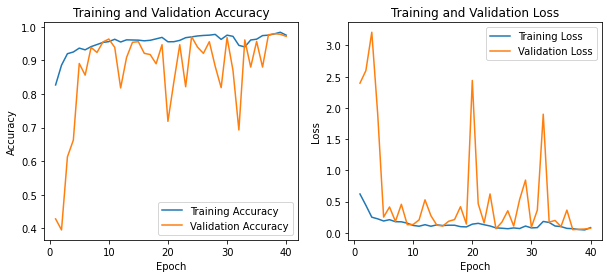

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Evaluating the model's performance based on the Test accuracy and Test loss.

In [ ]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1126/1126 [==============================] - 13s 11ms/step - loss: 0.0624 - accuracy: 0.9751
Test loss: 0.06241441145539284
Test accuracy: 0.9751332402229309


In [ ]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

1126/1126 [==============================] - 13s 11ms/step


array([0, 0, 0, ..., 3, 3, 3])

Confusion matrics to see how many correct and incorrect prediction our model has made for each class

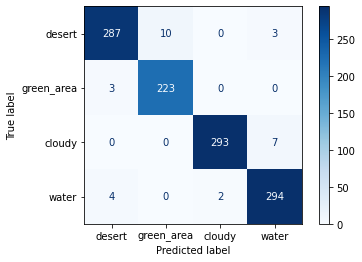

In [ ]:
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of trained classification model. 

In [ ]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       300
           1       0.96      0.99      0.97       226
           2       0.99      0.98      0.98       300
           3       0.97      0.98      0.97       300

    accuracy                           0.97      1126
   macro avg       0.97      0.98      0.97      1126
weighted avg       0.97      0.97      0.97      1126



###Here we have done taken another model for the same dataset with 4 layer

In [ ]:
model2 = Sequential()
model2.add(Conv2D(100, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(64,64, 3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding="same"))
model2.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding="same"))
model2.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding="same"))
model2.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model2.add(Dropout(0.3))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding="same"))
model2.add(Flatten())
model2.add(Dense(units=512, activation="relu"))
model2.add(Dropout(0.4))
model2.add(Dense(units=4, activation="softmax"))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

training the model for 40 epoch

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history02 = model2.fit(train_data,
                    validation_data=test_data,
                    epochs=40
                    )
                    #callbacks=[callback])

Epoch 1/40
141/141 [==============================] - 162s 1s/step - loss: 0.4634 - accuracy: 0.8395 - val_loss: 1.8272 - val_accuracy: 0.4663
Epoch 2/40
141/141 [==============================] - 165s 1s/step - loss: 0.2624 - accuracy: 0.9083 - val_loss: 2.2905 - val_accuracy: 0.3020
Epoch 3/40
141/141 [==============================] - 165s 1s/step - loss: 0.2106 - accuracy: 0.9259 - val_loss: 1.7783 - val_accuracy: 0.6758
Epoch 4/40
141/141 [==============================] - 165s 1s/step - loss: 0.2007 - accuracy: 0.9323 - val_loss: 2.7195 - val_accuracy: 0.4583
Epoch 5/40
141/141 [==============================] - 164s 1s/step - loss: 0.1720 - accuracy: 0.9374 - val_loss: 0.2729 - val_accuracy: 0.9023
Epoch 6/40
141/141 [==============================] - 161s 1s/step - loss: 0.1785 - accuracy: 0.9339 - val_loss: 0.2762 - val_accuracy: 0.9050
Epoch 7/40
141/141 [==============================] - 163s 1s/step - loss: 0.1286 - accuracy: 0.9501 - val_loss: 0.1584 - val_accuracy: 0.9485

In [ ]:
print(history02.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


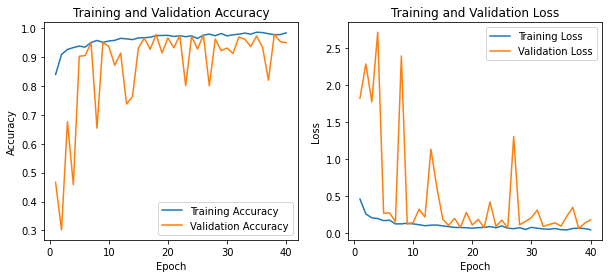

In [ ]:
acc = history02.history['accuracy']
val_acc = history02.history['val_accuracy']
loss = history02.history['loss']
val_loss = history02.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model2.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1126/1126 [==============================] - 17s 15ms/step - loss: 0.1717 - accuracy: 0.9520
Test loss: 0.17167171835899353
Test accuracy: 0.9520426392555237


In [ ]:
predict02 = model2.predict(test_data)
# predict the class label
y_classes02 = predict02.argmax(axis=-1)
y_classes02

1126/1126 [==============================] - 16s 14ms/step


array([0, 0, 0, ..., 3, 3, 3])

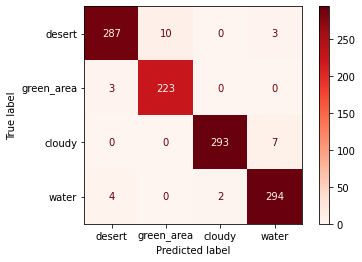

In [ ]:
cm2 = confusion_matrix(test_data.classes, y_classes)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)


disp2.plot(cmap=plt.cm.Reds)
plt.show();

classificaion report

In [ ]:
print(classification_report(test_data.classes, y_classes02))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       300
           1       1.00      0.98      0.99       226
           2       1.00      0.87      0.93       300
           3       0.88      1.00      0.93       300

    accuracy                           0.96      1126
   macro avg       0.97      0.96      0.96      1126
weighted avg       0.96      0.96      0.96      1126

